In [1]:
import random
from geoarray import GeoArray
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.signal import savgol_filter
from scipy.interpolate import splev, splrep
# importing ISOFIT
from isofit.utils import surface_model
from isofit.core.forward import ForwardModel
from isofit.configs.configs import create_new_config
from isofit.inversion.inverse import Inversion
from isofit.core.fileio import IO
import tkinter
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [16]:
from utils import *

In [17]:
displayText()

Import working


In [2]:
cluster = np.loadtxt(r'C:\Users\vpatro\Desktop\Final_Spectra\425\Cl_5.txt')

In [86]:
cluster.shape

(504178, 425)

(0.0, 0.65)

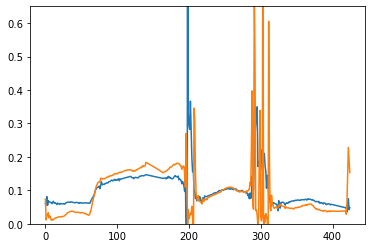

In [81]:
cluster[:, 105:120] = savgol_filter(cluster[:, 105:120], 11,1, axis = 1)
cluster[:, 140:165] = savgol_filter(cluster[:, 140:165], 21, 1, axis = 1)
cluster[:, 398:419] = savgol_filter(cluster[:, 398:419], 11, 1, axis = 1)


(0.0, 0.35)

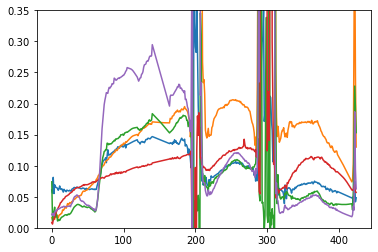

In [88]:
plt.plot(cluster[100000])
plt.plot(cluster[500000])
plt.plot(cluster[200000])
plt.plot(cluster[300000])
plt.plot(cluster[400000])
plt.ylim(0,0.35)

In [89]:
def sample_spectra(cluster_spectra:np.array, num_sets, num_samples):

    sample_sets = []
    
    for i in range(num_sets):
        sample = random.sample(range(0, cluster_spectra.shape[0]), num_samples)
        sample_sets.append(cluster_spectra[sample])
        
    sample_sets = np.array(sample_sets)
        
    return sample_sets

def add_RT_parameters(multi_set_spectra:np.array)-> np.array:
    
    augmented_set = []
    
    H2O = [1.75] * multi_set_spectra.shape[1]
    AOT = [0.05] * multi_set_spectra.shape[1]
    
    H2O = np.array(H2O)[:,None]
    AOT = np.array(AOT)[:,None]
    
    for i in range(multi_set_spectra.shape[0]):
        augmented = np.concatenate((multi_set_spectra[i], AOT), axis = 1)
        augmented = np.concatenate((augmented, H2O), axis = 1)
        augmented_set.append(augmented)
        
    augmented_set = np.array(augmented_set)
    
    return augmented_set

def run_ISOFIT(input_reflectance: np.array) -> np.array:
    
    # Surface model
    surface_model("C:\\Users\\vpatro\\Desktop\\isofit_vp\\examples\\20171108_Pasadena\\configs\\ang20171108t184227_surface.json")

    # Creating ISOFIT objects
    config = create_new_config("C:\\Users\\vpatro\\Desktop\\isofit_vp\\examples\\20171108_Pasadena\\configs\\ang20171108t184227_beckmanlawn.json")
    fm = ForwardModel(config)
    inv = Inversion(config, fm)
    io = IO(config, fm)
    io.get_components_at_index(0, 0)
    geom = io.current_input_data.geom # alternately, call via geom = Geometry()...this won't have data from the above config file
    meas = io.current_input_data.meas  # a numpy  array

    # adding in Radiative Transfer Parameters
    #x = np.loadtxt("C:\\Users\\vpatro\\Desktop\\avirisng_input.txt")
    input_reflectance = np.append(input_reflectance,0.05)
    input_reflectance = np.append(input_reflectance,1.75)
    
    radiance_measurement = fm.calc_rdn(input_reflectance,geom)
    OE_estimation = inv.invert(radiance_measurement, geom)[-1]
    
    return OE_estimation

In [90]:
def remove_bad_bands(spectra: np.array):
    bands = list(range(0,425))
    bands = np.array(bands)
    deeph2o = np.logical_or(np.logical_and(bands > 181, bands < 224), np.logical_and(bands > 275, bands < 329))
    bad_cal = np.logical_or(bands > 418, bands < 3)
    bad = np.logical_or(deeph2o, bad_cal)
    spectra[bad] = np.nan
    
    return spectra

In [84]:
# Appending RT parameters
sample_sets = sample_spectra(cluster, 5, 100)
print(sample_sets.shape)
augmented_sets = add_RT_parameters(sample_sets)
print(augmented_sets.shape)

(5, 100, 425)
(5, 100, 427)


In [91]:
l2norms = []
residuals = []
inputs = []
outputs = []

In [92]:
for i in range(100):
    input_vec = augmented_sets[0][i].copy()
    inputs.append(input_vec)
    OE_estimation = run_ISOFIT(input_vec)
    outputs.append(OE_estimation)
    l2norm = np.linalg.norm(input_vec - OE_estimation)
    l2norms.append(l2norm)
    residual = input_vec-OE_estimation
    residuals.append(residual)


In [93]:
for i in range(100):
    input_vec = augmented_sets[1][i].copy()
    inputs.append(input_vec)
    OE_estimation = run_ISOFIT(input_vec)
    outputs.append(OE_estimation)
    l2norm = np.linalg.norm(input_vec - OE_estimation)
    l2norms.append(l2norm)
    residual = input_vec-OE_estimation
    residuals.append(residual)


In [94]:
for i in range(100):
    input_vec = augmented_sets[2][i].copy()
    inputs.append(input_vec)
    OE_estimation = run_ISOFIT(input_vec)
    outputs.append(OE_estimation)
    l2norm = np.linalg.norm(input_vec - OE_estimation)
    l2norms.append(l2norm)
    residual = input_vec-OE_estimation
    residuals.append(residual)


In [95]:
for i in range(100):
    input_vec = augmented_sets[3][i].copy()
    inputs.append(input_vec)
    OE_estimation = run_ISOFIT(input_vec)
    outputs.append(OE_estimation)
    l2norm = np.linalg.norm(input_vec - OE_estimation)
    l2norms.append(l2norm)
    residual = input_vec-OE_estimation
    residuals.append(residual)


In [96]:
for i in range(100):
    input_vec = augmented_sets[4][i].copy()
    inputs.append(input_vec)
    OE_estimation = run_ISOFIT(input_vec)
    outputs.append(OE_estimation)
    l2norm = np.linalg.norm(input_vec - OE_estimation)
    l2norms.append(l2norm)
    residual = input_vec-OE_estimation
    residuals.append(residual)


In [98]:
inputs = np.array(inputs)
outputs = np.array(outputs)

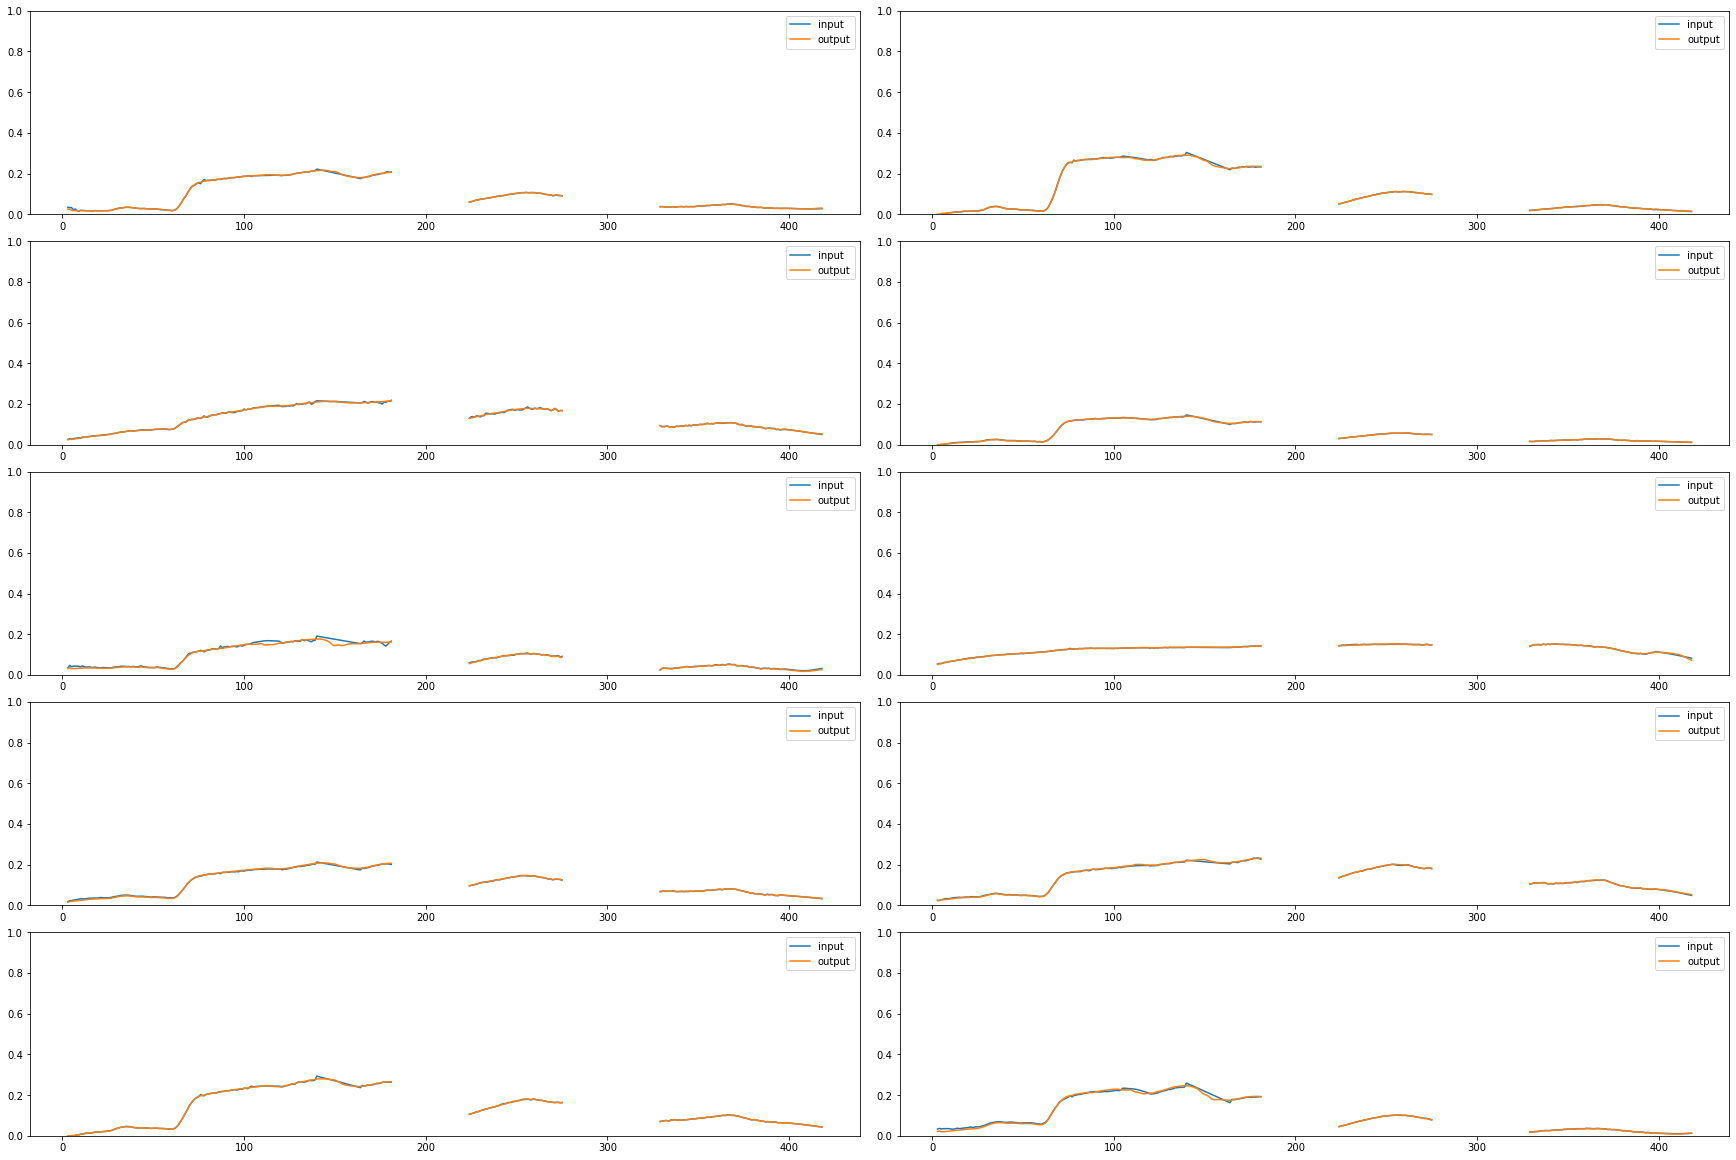

In [99]:
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (24,16), constrained_layout = True)

count = 0
row = 0
col = 0
for i in range(0,100,10):
    if col == 2:
        row +=1
        col = 0
    cleaned_input = remove_bad_bands(inputs[i,:425].copy())
    cleaned_output = remove_bad_bands(outputs[i][:425].copy())
    axs[row,col].plot(cleaned_input, label = 'input')
    axs[row,col].plot(cleaned_output, label = 'output')
    axs[row,col].legend()
    axs[row,col].set_ylim(0,1)
    col+= 1

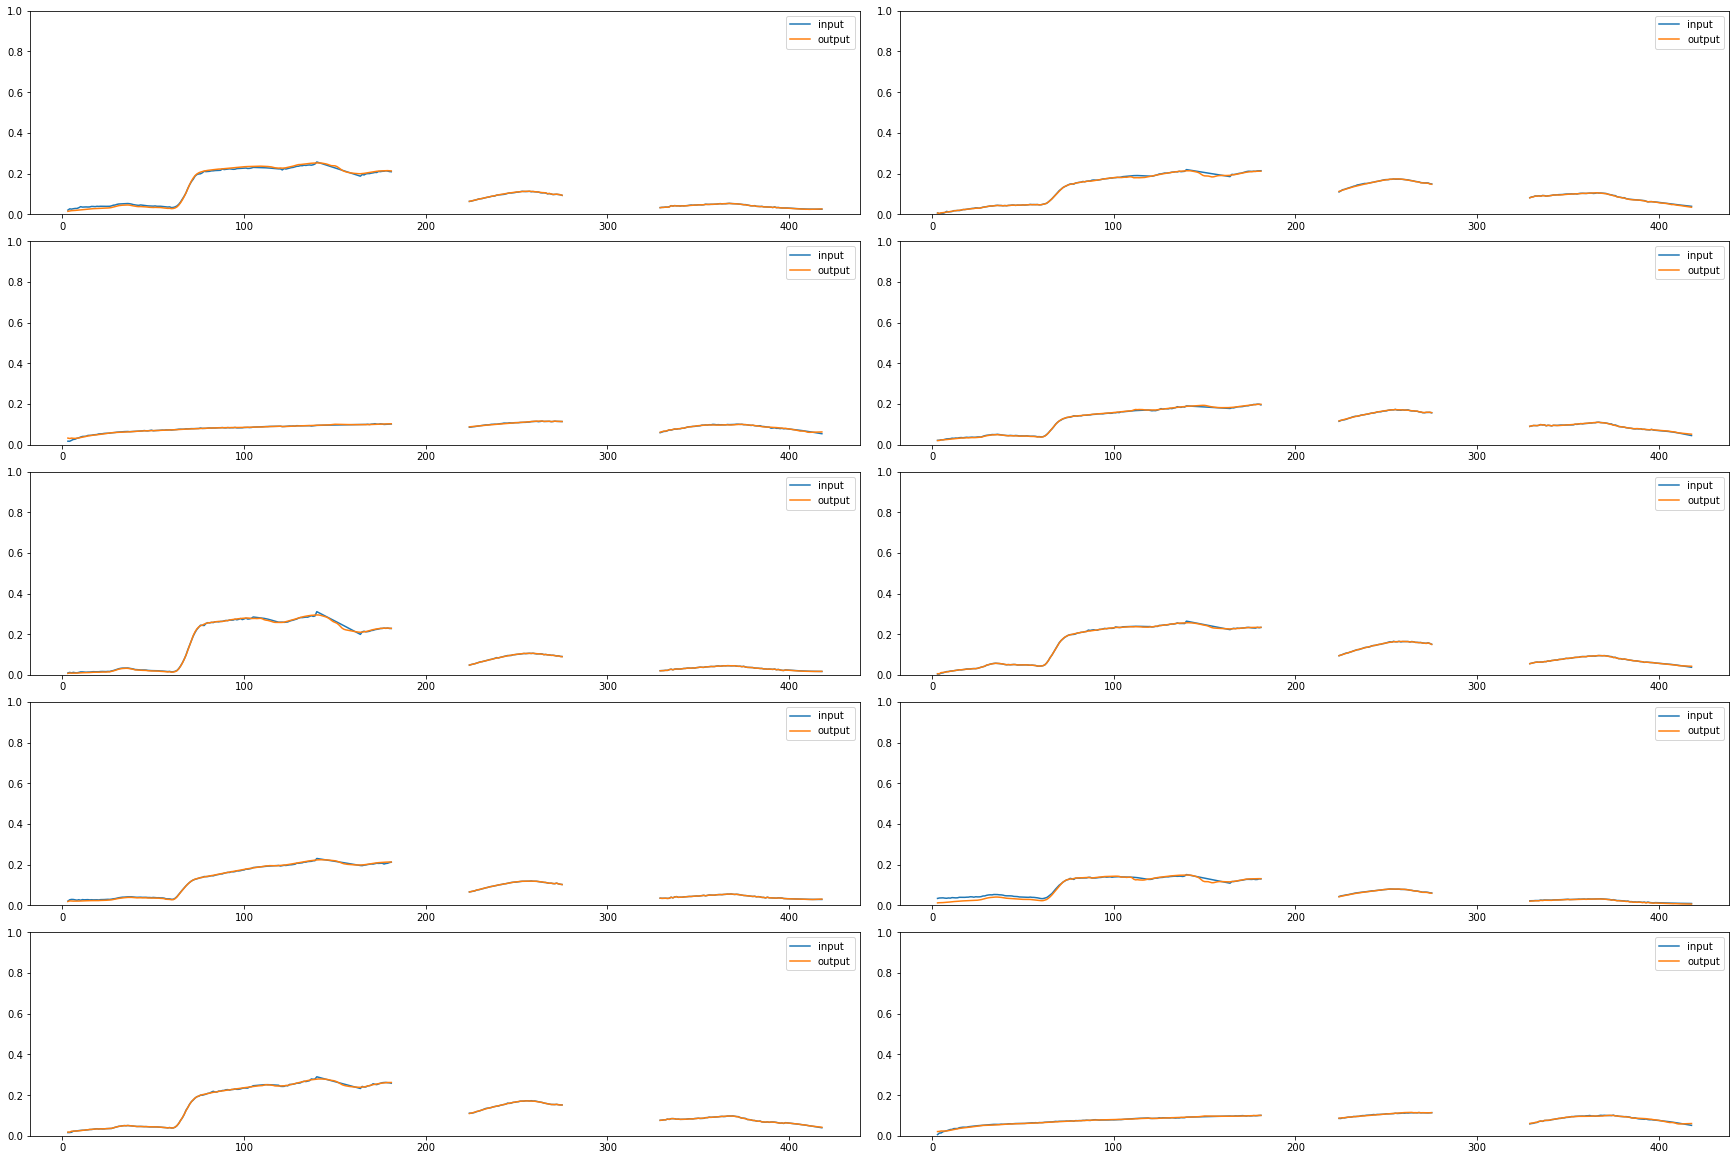

In [100]:
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (24,16), constrained_layout = True)

count = 0
row = 0
col = 0
for i in range(100,200,10):
    if col == 2:
        row +=1
        col = 0
    cleaned_input = remove_bad_bands(inputs[i,:425].copy())
    cleaned_output = remove_bad_bands(outputs[i][:425].copy())
    axs[row,col].plot(cleaned_input, label = 'input')
    axs[row,col].plot(cleaned_output, label = 'output')
    axs[row,col].legend()
    axs[row,col].set_ylim(0,1)
    col+= 1

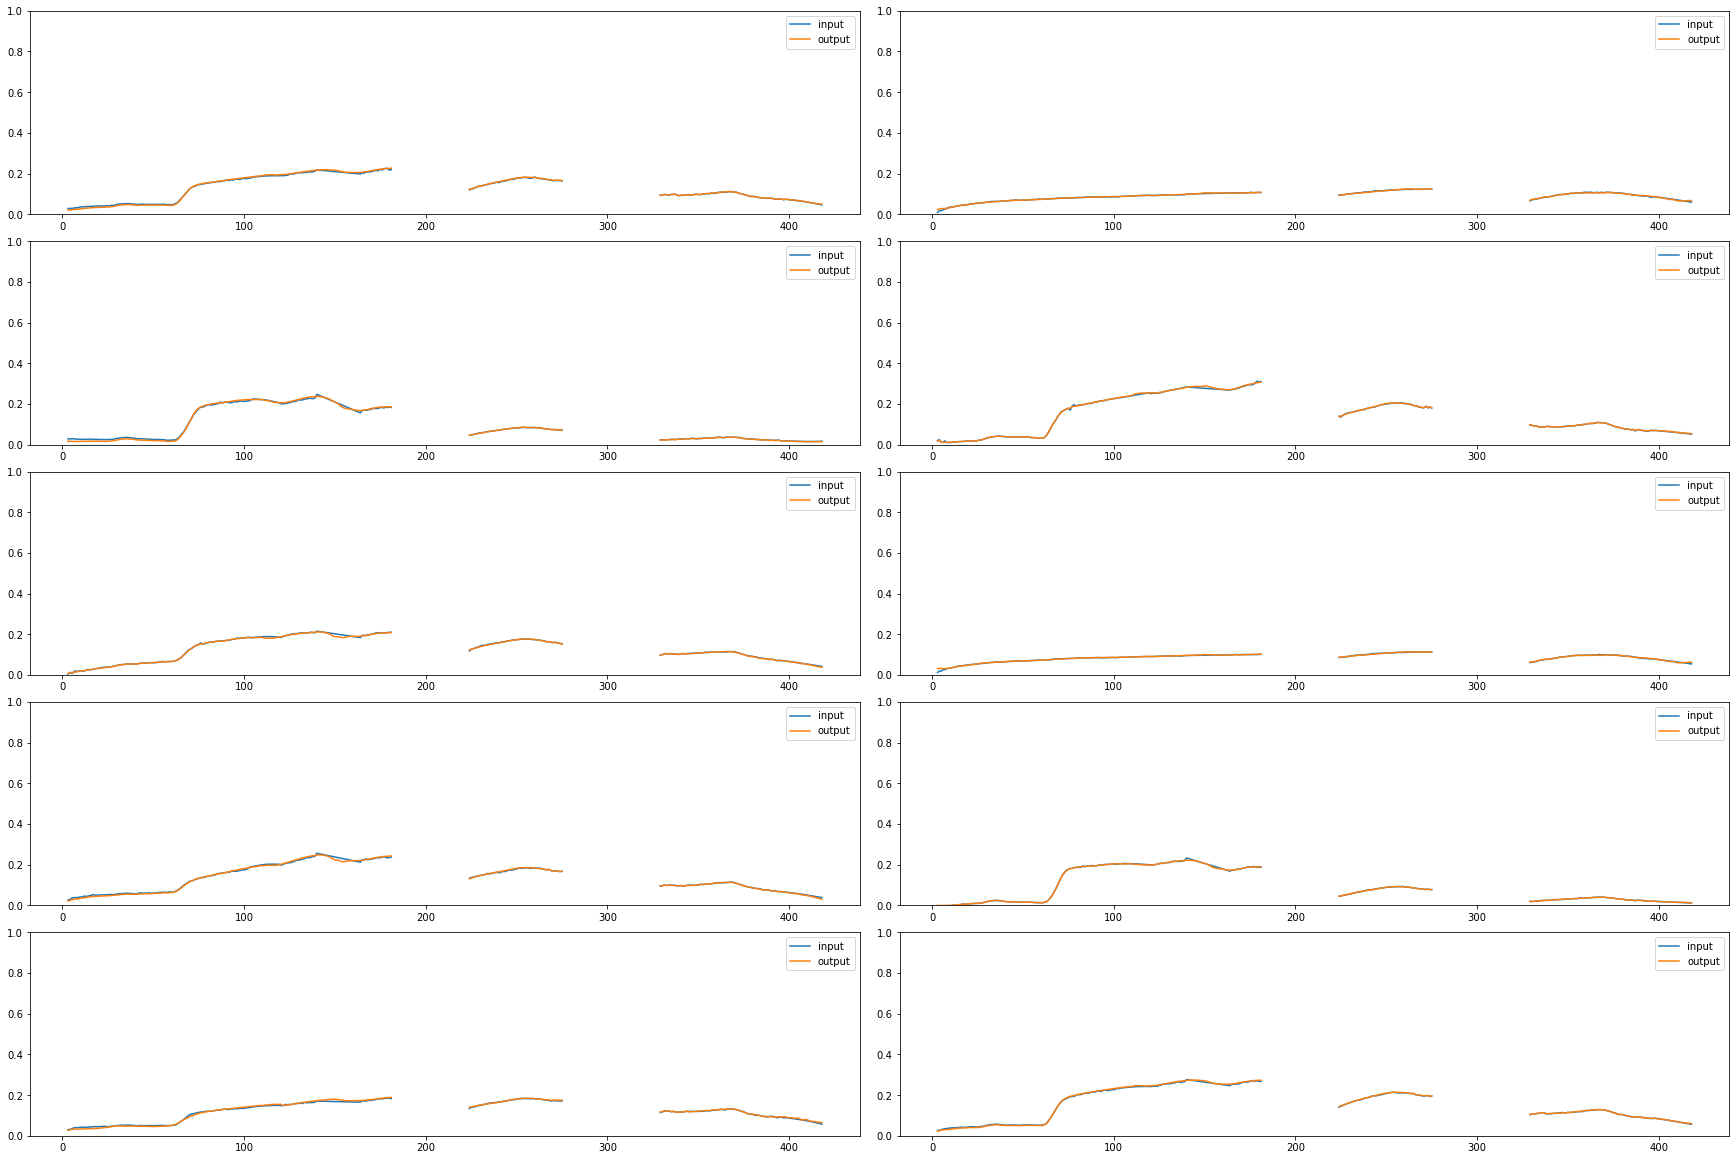

In [101]:
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (24,16), constrained_layout = True)

count = 0
row = 0
col = 0
for i in range(200,300,10):
    if col == 2:
        row +=1
        col = 0
    cleaned_input = remove_bad_bands(inputs[i,:425].copy())
    cleaned_output = remove_bad_bands(outputs[i][:425].copy())
    axs[row,col].plot(cleaned_input, label = 'input')
    axs[row,col].plot(cleaned_output, label = 'output')
    axs[row,col].legend()
    axs[row,col].set_ylim(0,1)
    col+= 1

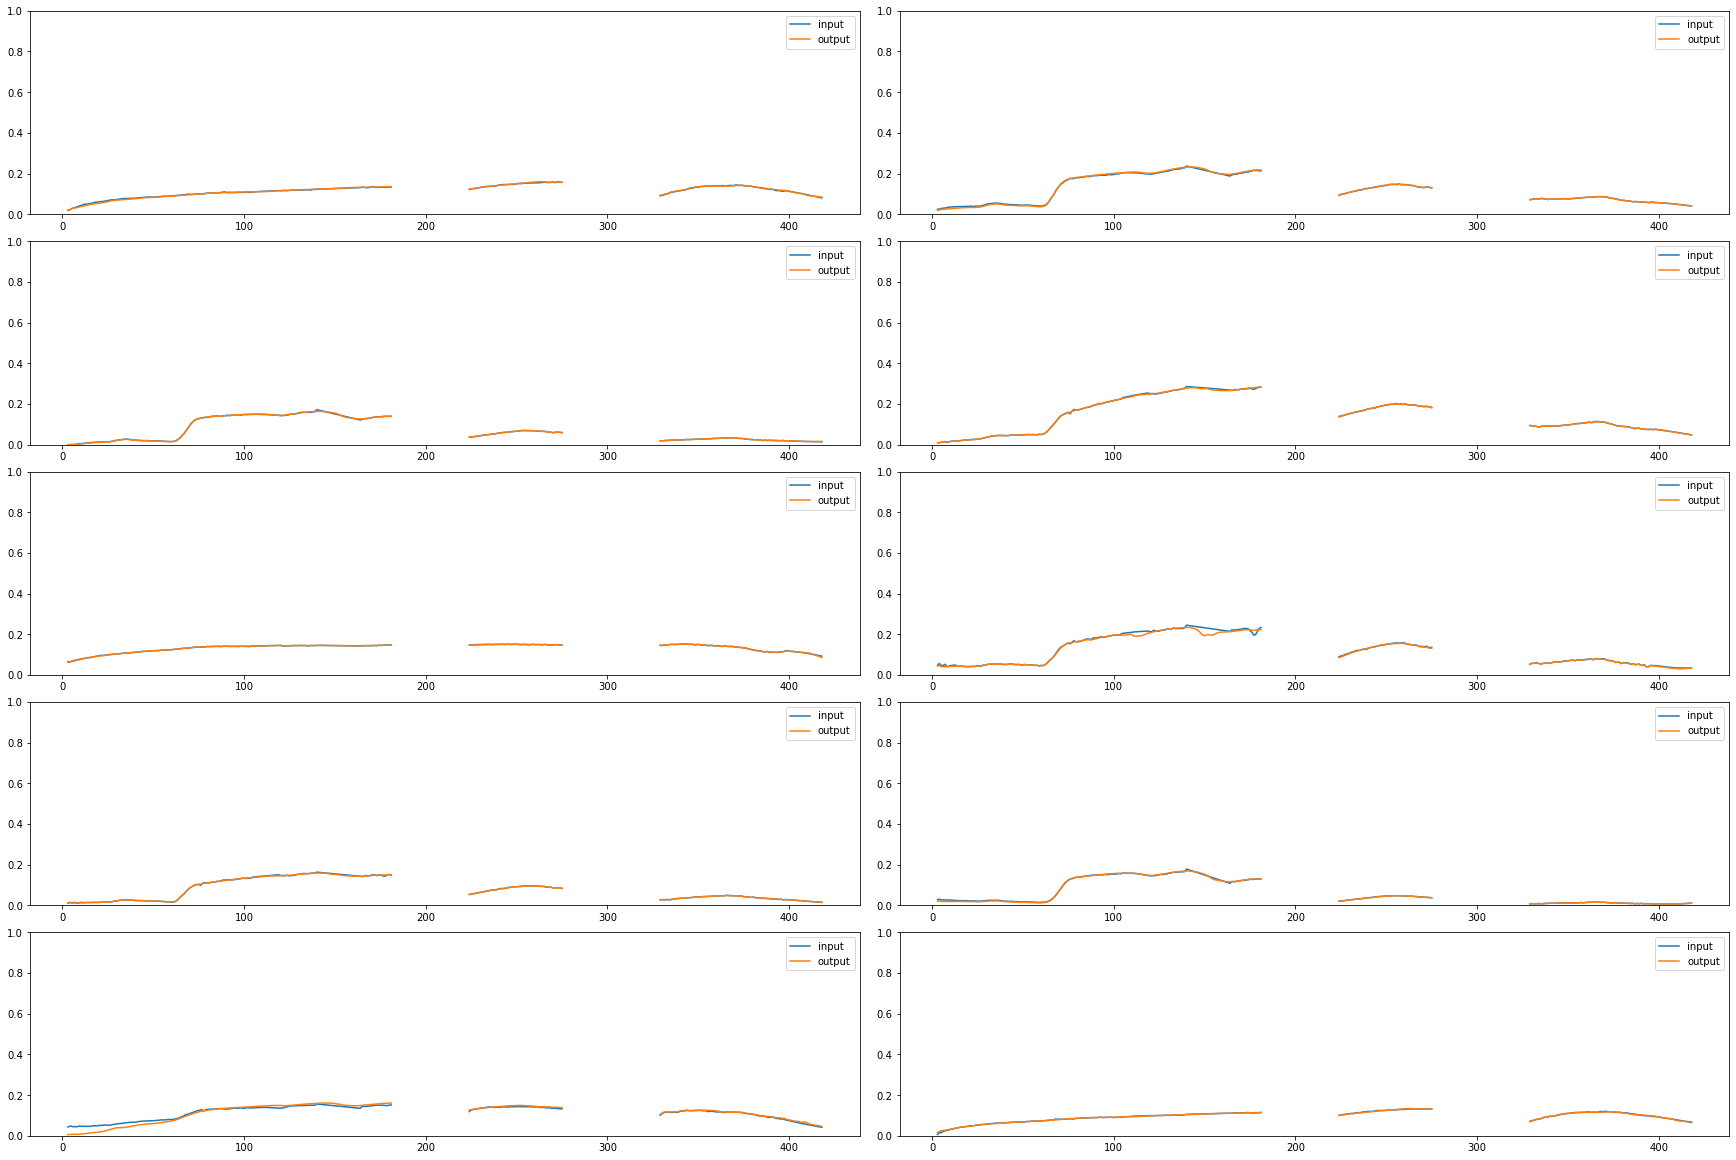

In [102]:
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (24,16), constrained_layout = True)

count = 0
row = 0
col = 0
for i in range(300,400,10):
    if col == 2:
        row +=1
        col = 0
    cleaned_input = remove_bad_bands(inputs[i,:425].copy())
    cleaned_output = remove_bad_bands(outputs[i][:425].copy())
    axs[row,col].plot(cleaned_input, label = 'input')
    axs[row,col].plot(cleaned_output, label = 'output')
    axs[row,col].legend()
    axs[row,col].set_ylim(0,1)
    col+= 1

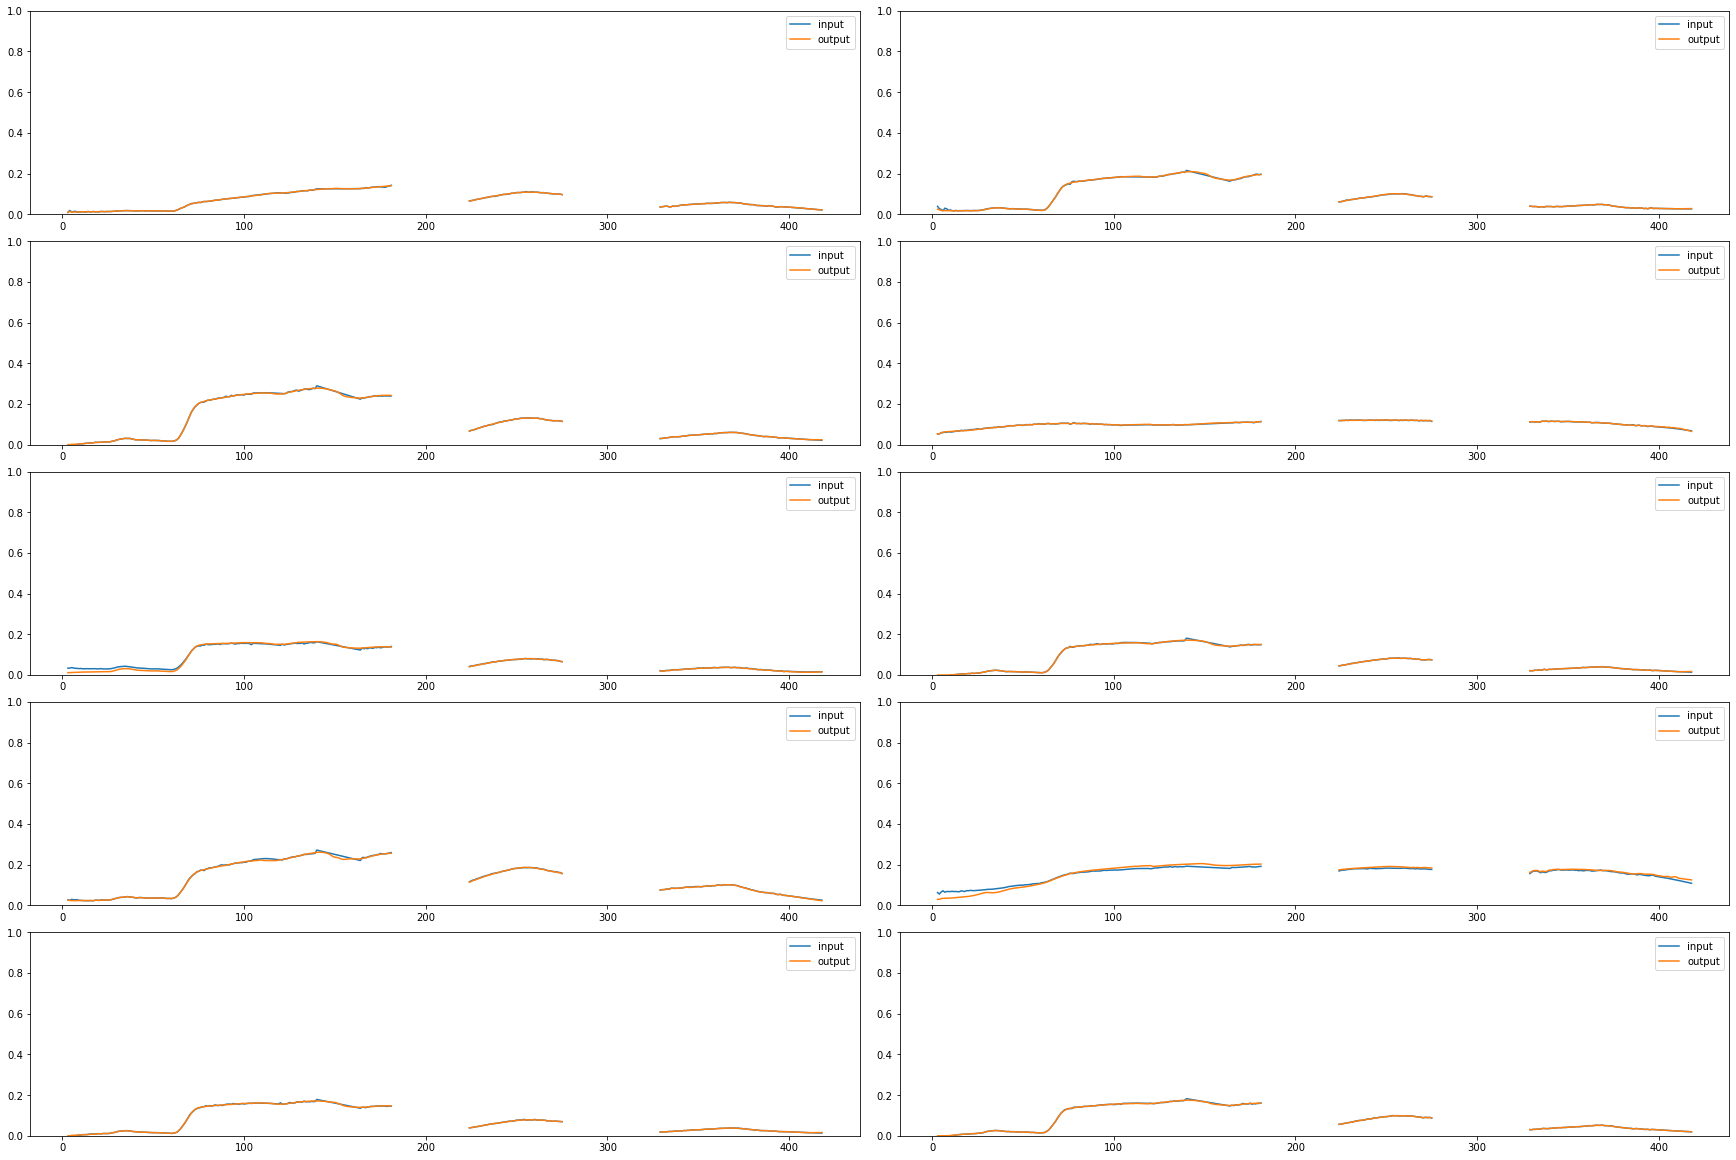

In [103]:
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (24,16), constrained_layout = True)

count = 0
row = 0
col = 0
for i in range(400,500,10):
    if col == 2:
        row +=1
        col = 0
    cleaned_input = remove_bad_bands(inputs[i,:425].copy())
    cleaned_output = remove_bad_bands(outputs[i][:425].copy())
    axs[row,col].plot(cleaned_input, label = 'input')
    axs[row,col].plot(cleaned_output, label = 'output')
    axs[row,col].legend()
    axs[row,col].set_ylim(0,1)
    col+= 1

In [104]:
print(inputs.shape)
print(outputs.shape)

(500, 427)
(500, 427)


In [105]:
len(residuals)

500

Text(0.5, 1.0, 'Covariance of Residuals')

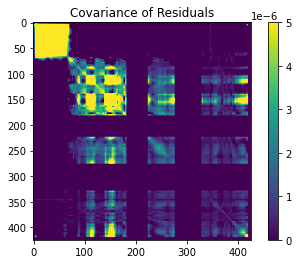

In [106]:
residuals = np.array(residuals)
res_cov = residuals[:,:425].copy()
bands = list(range(0,425))
bands = np.array(bands)
deeph2o = np.logical_or(np.logical_and(bands > 181, bands < 224), np.logical_and(bands > 275, bands < 329))
bad_cal = np.logical_or(bands < 4, bands > 418)
bad = np.logical_or(deeph2o, bad_cal)
res_cov[:, bad] = 0

Cov = np.cov(res_cov, rowvar=False)

plt.imshow(Cov)
plt.colorbar()
plt.clim(0,0.000005)
plt.title('Covariance of Residuals')

Plot residuals plt.plot

In [63]:
res_cov[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.60616938e-02,  2.87324506e-02,  2.49883810e-02,  2.20646186e-02,
        2.20899961e-02,  2.03401988e-02,  1.56237079e-02,  1.44704851e-02,
        1.24972565e-02,  1.14958625e-02,  1.15478633e-02,  1.08999737e-02,
        9.03689202e-03,  9.13114452e-03,  9.57112313e-03,  7.99341493e-03,
        1.07018240e-02,  1.05186214e-02,  1.08531206e-02,  9.11081833e-03,
        9.23375545e-03,  9.01496616e-03,  7.17746046e-03,  6.98564982e-03,
        8.73947460e-03,  6.41904948e-03,  6.09741857e-03,  5.75290204e-03,
        4.94576663e-03,  3.02833365e-03,  3.31193748e-03,  4.38329256e-03,
        3.49139239e-03,  3.21985656e-03,  3.80710336e-03,  4.32817403e-03,
        4.98748095e-03,  6.36186588e-03,  7.46955432e-03,  6.90119309e-03,
        4.64125951e-03,  3.14883090e-03,  2.68091572e-03,  4.26719042e-03,
        3.97176369e-03,  4.19255348e-03,  3.72364351e-03,  4.15727619e-03,
        4.40397770e-03,  

In [59]:
augmented_sets[0].shape

(10, 427)

In [34]:
np.savetxt(r'C:\Users\vpatro\Desktop\cluster5_subset.txt', augmented_sets[0])